Revenue Decline Root Cause Analysis

Objective:
This project analyzes historical revenue data to identify the key factors responsible for a decline in revenue and provide actionable business insights.

Problem Statement:
The company is experiencing a revenue decline, but the underlying drivers (product performance, customer behavior, regional trends, or time-based patterns) are not clearly identified.

Approach:

Clean and preprocess raw sales data

Identify and analyze key revenue KPIs

Perform exploratory data analysis to detect trends and anomalies

Prepare a clean dataset for Power BI visualization

Outcome:
The project delivers clear insights into revenue decline drivers and a dashboard-ready dataset to support data-driven decision-making.

Loading Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

Loading the dataset

In [11]:
df = pd.read_csv(r"C:\Users\rutuj\OneDrive\Desktop\Data_analytics_project\Retail_Sales_Revenue_Root_Cause_Analysis\Data\retail_sales_dataset.csv")
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [12]:
df.shape

(1000, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [24]:
df.head(3)


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,month_name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,January


In [15]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,41.39,2.51,179.89,456.00
std,288.82,13.68,1.13,189.68,560.00
min,1.00,18.00,1.00,25.00,25.00
25%,250.75,29.00,1.00,30.00,60.00
50%,500.50,42.00,3.00,50.00,135.00
75%,750.25,53.00,4.00,300.00,900.00
max,1000.00,64.00,4.00,500.00,2000.00


In [18]:
#Converting the datetype of date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
#Standardising the column names 
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
)


In [22]:
#Validating the total total_Amt Consistency 
(df['quantity'] * df['price_per_unit'] == df['total_amount']).value_counts()


True    1000
Name: count, dtype: int64

In [23]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()


In [25]:
df_clean = df.copy()

In [26]:
#Saving the cleaned dataset
df_clean.to_csv('cleaned_retail_sales.csv', index=False)


## Key Performance Indicators (KPI) Definition & Validation


In [28]:
# 1) Total Revenues 
total_revenue = df_clean['total_amount'].sum() 
total_revenue

np.int64(456000)

In [29]:
# 2)Total Transactions
total_transactions = df_clean['transaction_id'].nunique()
total_transactions


1000

In [30]:
# 3) Average Order Value (AOV)
average_order_value = total_revenue / total_transactions
average_order_value


np.float64(456.0)

In [31]:
# 4) Total Quantity Sold
total_quantity = df_clean['quantity'].sum()
total_quantity


np.int64(2514)

In [32]:
# 5)Average price per unit
avg_price_per_unit = df_clean['price_per_unit'].mean()
avg_price_per_unit


np.float64(179.89)

In [33]:
# 6) Revenue Collected by Product Category
revenue_by_category = (
    df_clean
    .groupby('product_category')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

revenue_by_category


product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64

In [34]:
# 7) Monthly Revenue Trends
monthly_revenue = (
    df_clean
    .groupby(['year', 'month'])['total_amount']
    .sum()
    .reset_index()
    .sort_values(['year', 'month'])
)

monthly_revenue.head()


,year,month,total_amount
0,2023,1,35450
1,2023,2,44060
2,2023,3,28990
3,2023,4,33870
4,2023,5,53150


## 1 Revenue vs Order Volume Trends

### Business Question
 ### 1.1 Is total revenue declining over time while order volume is increasing?

### Purpose of Analysis
This analysis aims to validate whether revenue decline is driven by reduced demand or by a mismatch between order volume and revenue generation. Establishing this trend is critical before investigating pricing, product mix, or customer behavior.


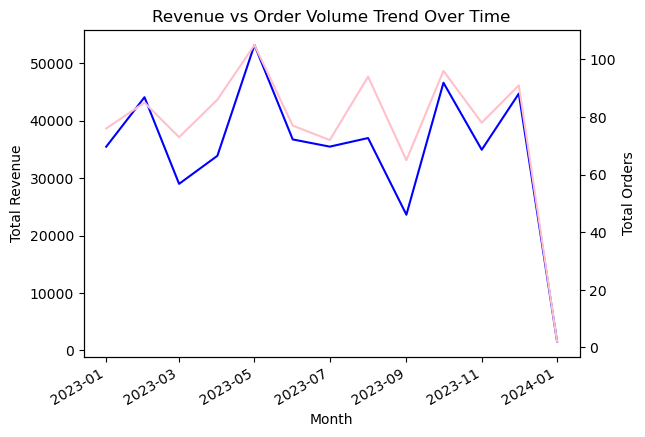

In [40]:
# Create Year-Month column for aggregation
df['year_month'] = df['date'].dt.to_period('M')

# Aggregate Revenue and Order Volume
monthly_trends = (
    df.groupby('year_month')
      .agg(
          total_revenue=('total_amount', 'sum'),
          total_orders=('transaction_id', 'nunique')
      )
      .reset_index()
)

# Convert period to timestamp for plotting
monthly_trends['year_month'] = monthly_trends['year_month'].dt.to_timestamp()

# Plot Revenue and Order Volume
fig, ax1 = plt.subplots()

ax1.plot(monthly_trends['year_month'], monthly_trends['total_revenue'],color='blue', label='Total Revenue')
ax1.set_ylabel('Total Revenue')

ax2 = ax1.twinx()
ax2.plot(monthly_trends['year_month'], monthly_trends['total_orders'],color='pink', label='Total Orders')
ax2.set_ylabel('Total Orders')

ax1.set_title('Revenue vs Order Volume Trend Over Time')
ax1.set_xlabel('Month')
fig.autofmt_xdate()
plt.show()

### Insight: Revenue vs Order Volume Trend

Order volume remains relatively stable over time, while total revenue shows higher volatility and lacks consistent growth. This indicates that revenue decline is not driven by reduced demand, but by weaker revenue generated per order.

The sharp drop in the final month is likely due to incomplete data and should be interpreted with caution. Overall, the business appears to be maintaining volume without proportional revenue growth, pointing toward declining revenue quality.



### 1.2 Is the decline in revenue consistent across months, or is it driven by specific periods?

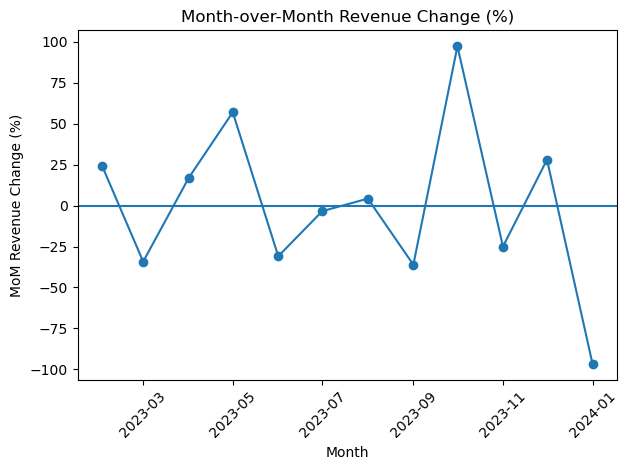

In [42]:
# Sort values to ensure correct MoM calculation
monthly_trends = monthly_trends.sort_values('year_month')

# Calculate Month-over-Month Revenue Change
monthly_trends['revenue_mom_change_pct'] = (
    monthly_trends['total_revenue'].pct_change() * 100
)

# Plot Month-over-Month Revenue Change
plt.figure()
plt.plot(
    monthly_trends['year_month'],
    monthly_trends['revenue_mom_change_pct'],
    marker='o'
)
plt.axhline(0)
plt.title('Month-over-Month Revenue Change (%)')
plt.xlabel('Month')
plt.ylabel('MoM Revenue Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight: Consistency of Revenue Decline

Revenue shows significant month-over-month volatility, with sharp increases and declines across periods. This indicates that the revenue decline is not consistent over time but is driven by specific months.

Such fluctuations suggest that revenue performance is influenced by episodic factors rather than a structural demand decline, reinforcing the need to examine pricing, product mix, and customer behavior in subsequent analysis.


## 2 Pricing & Mix Shift Analysis

### Average Order Value (AOV) Trend

**Business Question**  
 2.1 Is Average Order Value (AOV) decreasing over time?

**Purpose of Analysis**  
This analysis evaluates whether revenue decline is driven by customers placing lower-value orders over time, which would indicate weakening pricing power or changes in purchase behavior.


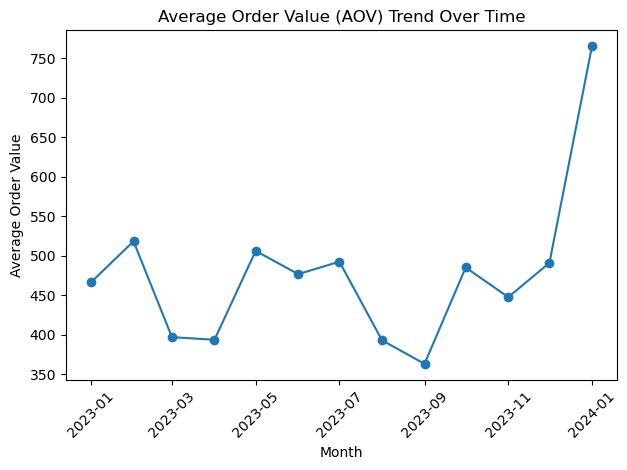

In [47]:
# Calculate monthly AOV
monthly_trends['AOV'] = (
    monthly_trends['total_revenue'] / monthly_trends['total_orders']
)
monthly_trends

# Plot AOV trend
plt.figure()
plt.plot(
    monthly_trends['year_month'],
    monthly_trends['AOV'],
    marker='o'
)
plt.title('Average Order Value (AOV) Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight: Average Order Value Trend
Average Order Value fluctuates over time rather than showing a steady decline. While certain months reflect lower AOV, there is no consistent downward trend across the period. The sharp increase in the final month is driven by very low order volume and should be interpreted with caution.

Overall, AOV volatility suggests changing purchase behavior rather than uniform pricing deterioration.


**Business Question**  
2.2 Is revenue per unit decreasing over time, indicating pricing pressure?

**Purpose of Analysis**  
This analysis examines whether the business is earning less per unit sold, which may suggest a shift toward cheaper products or reduced pricing effectiveness.


In [54]:
# Aggregate monthly quantity
monthly_units = (
    df.groupby('year_month')
      .agg(
          total_revenue=('total_amount', 'sum'),
          total_units=('quantity', 'sum')
      )
      .reset_index()
)

monthly_units['year_month'] = monthly_units['year_month'].dt.to_timestamp()

# Calculate Revenue per Unit
monthly_units['revenue_per_unit'] = (
    monthly_units['total_revenue'] / monthly_units['total_units']
)

monthly_units


,year_month,total_revenue,total_units,revenue_per_unit
0,2023-01-01,35450,195,181.79
1,2023-02-01,44060,214,205.89
2,2023-03-01,28990,194,149.43
3,2023-04-01,33870,214,158.27
4,2023-05-01,53150,259,205.21
5,2023-06-01,36715,197,186.37
6,2023-07-01,35465,176,201.51
7,2023-08-01,36960,227,162.82
8,2023-09-01,23620,170,138.94
9,2023-10-01,46580,252,184.84


### Insight: Revenue per Unit Trend

Revenue per unit shows noticeable month-to-month fluctuations but does not exhibit a sustained downward trend. This indicates that pricing pressure at the unit level is not consistent across periods.

The unusually high value observed in the final month is a result of very low units sold and does not reflect a genuine improvement in pricing power.


**Business Question**  
2.3 Is sales growth driven by lower-priced product categories?

**Purpose of Analysis**  
This analysis evaluates whether revenue and volume growth are increasingly concentrated in lower-priced categories, which could explain declining revenue quality despite stable or growing sales volume.


In [55]:
# Category-level aggregation
category_summary = (
    df.groupby('product_category')
      .agg(
          total_revenue=('total_amount', 'sum'),
          total_units=('quantity', 'sum')
      )
      .reset_index()
)

# Calculate average price per unit by category
category_summary['avg_price_per_unit'] = (
    category_summary['total_revenue'] / category_summary['total_units']
)
category_summary

,product_category,total_revenue,total_units,avg_price_per_unit
0,Beauty,143515,771,186.14
1,Clothing,155580,894,174.03
2,Electronics,156905,849,184.81


### Insight: Product Category Mix Shift

Analysis of product categories shows that Clothing has a lower average price per unit compared to Beauty and Electronics. If sales growth is increasingly driven by this lower-priced category, it can contribute to declining revenue quality despite stable or growing order volume.

This suggests that product mix shift, rather than broad price reductions, may be influencing overall revenue performance.


## 3 Product Category Impact

###  Category Contribution to Revenue Over Time

**Business Question**  
3.1 Which product categories contribute most to the revenue decline?

**Purpose of Analysis**  
This analysis evaluates revenue trends at the product category level to identify whether specific categories are responsible for the overall revenue decline.


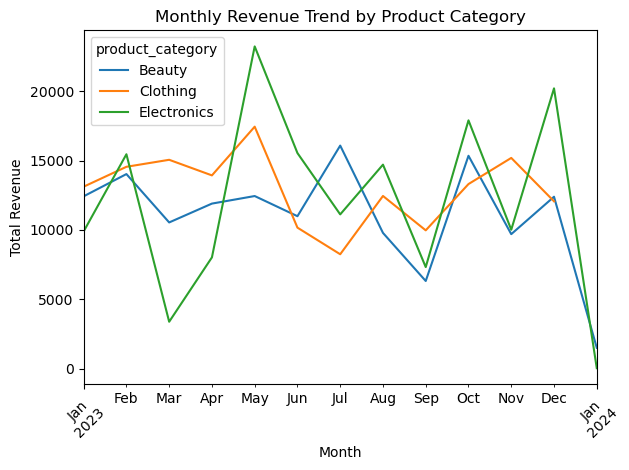

In [61]:
# Monthly revenue by product category
category_monthly_revenue = (
    df.groupby(['year_month', 'product_category'])
      .agg(
          total_revenue=('total_amount', 'sum'),
          total_units=('quantity', 'sum')
      )
      .reset_index()
)

category_monthly_revenue['year_month'] = category_monthly_revenue['year_month'].dt.to_timestamp()
category_monthly_revenue
# Pivot for visualization
category_revenue_pivot = category_monthly_revenue.pivot(
    index='year_month',
    columns='product_category',
    values='total_revenue'
)
# Plot revenue trend by category
category_revenue_pivot.plot()
plt.title('Monthly Revenue Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight: Category-Level Revenue Trends

Revenue trends vary noticeably across product categories, indicating that the overall revenue decline is not uniform. Electronics and Clothing show higher volatility with sharp peaks and dips across months, while Beauty exhibits relatively more stable performance.

The simultaneous decline across categories in the final month is likely due to incomplete data rather than a true business downturn. Overall, revenue decline appears to be driven by category-specific fluctuations rather than a single consistently underperforming category.


**Business Question**  
3.2 Are high-volume product categories generating disproportionately low revenue?

**Purpose of Analysis**  
This analysis compares sales volume and revenue across product categories to identify categories that contribute high transaction volume but relatively low revenue.


In [67]:
# Aggregate total revenue and volume by category
category_summary = (
    df.groupby('product_category')
      .agg(
          total_revenue=('total_amount', 'sum'),
          total_units=('quantity', 'sum')
      )
      .reset_index()
)
category_summary



,product_category,total_revenue,total_units
0,Beauty,143515,771
1,Clothing,155580,894
2,Electronics,156905,849


### Insight: Volume vs Revenue by Product Category

Clothing emerges as the highest-volume category but does not generate proportionally higher revenue compared to Electronics. Electronics, despite slightly lower volume, contributes the highest total revenue, indicating stronger revenue efficiency.

This suggests that sales growth driven by high-volume categories such as Clothing may dilute overall revenue quality, contributing to the observed revenue decline.
m

## 4. Customer Segmentation Analysis
Customer Value Distribution

**Business Question**  
4.1 Are new or low-value customers driving order growth?

**Purpose of Analysis**  
This analysis evaluates whether order growth is driven by customers who contribute relatively low revenue, indicating potential dilution of revenue quality.


In [70]:
# Customer-level aggregation
customer_summary = (
    df.groupby('customer_id')
      .agg(
          total_revenue=('total_amount', 'sum'),
          total_orders=('transaction_id', 'nunique')
      )
      .reset_index()
)

customer_summary


,customer_id,total_revenue,total_orders
0,CUST001,150,1
1,CUST002,1000,1
2,CUST003,30,1
3,CUST004,500,1
4,CUST005,100,1
...,...,...,...
995,CUST995,30,1
996,CUST996,50,1
997,CUST997,90,1
998,CUST998,100,1


### Insight: Customer Value Distribution

Each customer in the dataset places only a single order, indicating that order volume is driven entirely by one-time or low-engagement customers. Revenue per customer varies widely, suggesting that growth is coming from a broad base of low-value customers rather than repeat high-value customers.

This customer structure limits revenue growth potential and indicates weak customer retention.


**Business Question**  
4.2 Which customer segments based on age and gender generate high order volume but relatively low revenue?

**Purpose of Analysis**  
This analysis compares revenue and order volume across demographic segments to identify customer groups contributing to volume growth without proportional revenue contribution.


In [73]:
# Revenue and volume by Age
age_summary = (
    df.groupby('age')
      .agg(
          total_revenue=('total_amount', 'sum'),
          total_orders=('transaction_id', 'nunique')
      )
      .reset_index()
)

# Revenue and volume by Gender
gender_summary = (
    df.groupby('gender')
      .agg(
          total_revenue=('total_amount', 'sum'),
          total_orders=('transaction_id', 'nunique')
      )
      .reset_index()
)

age_summary, gender_summary


(    age  total_revenue  total_orders
 0    18          11215            21
 1    19          14870            21
 2    20           8645            21
 3    21          12585            20
 4    22          13700            27
 5    23           8220            24
 6    24           5415            15
 7    25           9900            20
 8    26          13980            22
 9    27           9385            23
 10   28           8670            21
 11   29           6570            16
 12   30           9790            22
 13   31          10220            22
 14   32           5550            19
 15   33           6240            10
 16   34          16785            28
 17   35          11290            22
 18   36           9105            15
 19   37          11650            16
 20   38          11100            19
 21   39           4595            18
 22   40           9415            24
 23   41           5650            21
 24   42           8500            26
 25   43    

### Insight: Demographic Segment Performance

Revenue and order volume are distributed across multiple age groups, with no single age segment consistently generating higher revenue per order. This indicates that volume growth across age segments does not necessarily translate into proportional revenue growth.

Gender-wise performance is relatively balanced, with similar order volumes and revenue contribution from male and female customers. Demographics alone do not explain the revenue decline, reinforcing the role of pricing and product mix factors.


**Business Question**  
4.3 Is total revenue concentrated among a small group of high-value customers?

**Purpose of Analysis**  
This analysis evaluates whether a limited set of customers contributes a disproportionate share of revenue, indicating potential concentration risk.


In [74]:
# Sort customers by revenue contribution
customer_summary_sorted = customer_summary.sort_values(
    by='total_revenue', ascending=False
)

# Calculate cumulative revenue share
customer_summary_sorted['cumulative_revenue'] = (
    customer_summary_sorted['total_revenue'].cumsum()
)

customer_summary_sorted['cumulative_revenue_pct'] = (
    customer_summary_sorted['cumulative_revenue'] /
    customer_summary_sorted['total_revenue'].sum()
) * 100

customer_summary_sorted.head(10)

,customer_id,total_revenue,total_orders,cumulative_revenue,cumulative_revenue_pct
14,CUST015,2000,1,2000,0.44
412,CUST412,2000,1,4000,0.88
970,CUST970,2000,1,6000,1.32
547,CUST547,2000,1,8000,1.75
281,CUST281,2000,1,10000,2.19
416,CUST416,2000,1,12000,2.63
420,CUST420,2000,1,14000,3.07
927,CUST927,2000,1,16000,3.51
447,CUST447,2000,1,18000,3.95
342,CUST342,2000,1,20000,4.39


### Insight: Revenue Concentration Risk

Revenue is not concentrated among a small group of high-value customers. The top customers contribute only a small fraction of total revenue, and all customers place a single order.

This indicates a highly fragmented revenue base with no strong dependence on high-value customers, increasing reliance on continuous acquisition of new customers to sustain revenue.


### 5 Strategic Insights

**Business Question**

5.1 Is the business trading revenue quality for volume growth?

### Strategic Insight: Revenue Quality vs Volume Growth

The business is clearly trading revenue quality for order volume growth. While transaction volume remains stable, revenue does not scale proportionally due to lower average order values, volatile unit pricing, and a growing dependence on lower-priced product categories.

Additionally, the absence of repeat or high-value customers indicates that volume growth is driven by low-engagement, one-time buyers. This growth model sustains activity but weakens long-term revenue quality and profitability.


### Customer–Product Interaction Impact

**Business Question**  
5.2 Which combination of customer segment and product category contributes most to low revenue generation?

**Purpose of Analysis**  
This analysis identifies customer-category combinations that generate high transaction volume but weak revenue contribution, highlighting structurally harmful revenue drivers.


In [79]:
# Customer-category interaction analysis
customer_category_summary = (
    df.groupby(['gender', 'product_category'])
      .agg(
          total_revenue=('total_amount', 'sum'),
          total_units=('quantity', 'sum')
      )
      .reset_index()
)

# Revenue efficiency
customer_category_summary['revenue_per_unit'] = (
    customer_category_summary['total_revenue'] /
    customer_category_summary['total_units']
)

customer_category_summary.sort_values('revenue_per_unit')


,gender,product_category,total_revenue,total_units,revenue_per_unit
4,Male,Clothing,74305,453,164.03
2,Female,Electronics,76735,439,174.79
0,Female,Beauty,74830,418,179.02
1,Female,Clothing,81275,441,184.30
3,Male,Beauty,68685,353,194.58
5,Male,Electronics,80170,410,195.54


### Strategic Insight: Customer–Category Revenue Dilution

The Male–Clothing segment exhibits the lowest revenue per unit among all customer–category combinations, indicating high sales volume but weak revenue efficiency. This combination contributes disproportionately to revenue dilution and weakens overall revenue quality.

In contrast, Electronics purchases, particularly by male customers, generate significantly higher revenue per unit, highlighting a clear imbalance between volume-driven and value-driven sales.


## Final Conclusion & Recommendations

### Conclusion

The analysis confirms that the business is experiencing revenue decline despite stable order volume due to a deterioration in revenue quality rather than reduced demand. Revenue growth is being driven by low-value, one-time customers and a shift toward lower-priced product categories, resulting in weaker revenue realization per transaction.

Key drivers of the decline include volatile pricing signals, increasing reliance on high-volume but low-revenue categories such as Clothing, and the absence of repeat or high-value customers. High-efficiency categories like Electronics contribute strong revenue per unit but do not drive overall volume growth.

### Recommendations

- Rebalance product mix by promoting higher revenue-efficient categories such as Electronics and premium Beauty segments.
- Improve customer value by encouraging repeat purchases through targeted retention strategies rather than focusing solely on new customer acquisition.
- Monitor revenue quality KPIs such as Average Order Value and Revenue per Unit alongside order volume.
- Investigate pricing and margin data in future analysis to better understand profitability drivers.
